## MIDTERM
----------------------------------------------------------------------------
Author: Kevin Paganini     
Date: 1/13/2023     
Description: This is the midterm project for data science (CS3300). In this exam we will be looking at ascat samples from bobcats, coyotes and foxes. 


## Part 1

### 1. Read the provided article by Dr. Reid.   

Notes on Dr. Reid's article:     
- Scat produced by the species: Canis Latrans (coyotes), Lynx rufus (bobcats) and Urocyon cinereoargenteus (gray foxes)have histrocially been differentiated by morphology. 
- Dr. Reid compiled a database of morphological, biogeochemical and contextual traits (f.e. tracks) for a set of 122 scats. 
- Models to predict: random forest (62%) and discriminant function analysis (71%).
- 3 of the 12 variables were highly correlated with scat type: diameter, mass and C:N ratio.
- Use linear model as a first pass when trying to classify. 
- Linear model can detect specific types of scats with very high accuracy.
- Why scat? Scat is easily located and collection causes little disturbance   
- Morphology in the study of scat refers to the examination of the **physical** characteristics of animal feces, such as size, shape, and color. 
- Biogeochemical is an interdisciplinary field of study that examines the interactions between living organisms and the geochemical processes that occur in the environment. It is concerned with the movement of chemical elements and compounds through ecosystems and how they are affected by living organisms and physical processes. 
- Goal of paper: is amorphometric approach to scat identification sufficient for distinguishing among scats produced by three of the most common mammalian mesopredators in coastal California. 


#### Hypothesis:
If  morphology, morphology and contextual traits among scat samples truly  differs  among  coyote,  bobcat  and  gray  fox, then scats produced by these different carnivores should be  statistically separable into groups according to differences in their  morphologies  (and  biogeochemistry)  and  the  predictive models should have low misclassification rates.   

#### Bobcats: 
Bobcats are medium-sized wild cats that are found throughout North America, They typically weigh between 7 to 15 kg and have a body length of about 60-100 cm, with a distinctive ruffed appearance, tufted ears and a short, stubby tail of about 10-20 cm. Bobcats fur is reddish with black spots. Bobcats are opportunistic predators and will eat a wide variety of prey, including small mammals, birds, reptiles, and even fish. They are also known to eat domestic animals such as chickens and rabbits if given the opportunity. Bobcats are found in a wide range of habitats, including forests, swamps, deserts, and even suburban areas. They are elusive and reclusive animals, and sightings of them are relatively rare.

#### Coyotes: 
Coyotes are wild canines, part of the Canidae family that are found throughout North America, They typically weigh between 9-23 kg, and have a body length of about 100-130 cm, with a distinctive bushy tail and pointed ears. Coyotes just like bobcats are opportunistic and eat a wide variety of prey, including small mammals, birds, reptiles, and even fruits and vegetables. They are also known to scavenge on human-provided food sources such as garbage and pet food if given the opportunity. Coyotes are found in a wide range of habitats, including forests, grasslands, deserts, and even urban areas. They are adaptable animals, known for their intelligence and resourcefulness. Coyotes, just like gray foxes are nocturnal.

#### Gray foxes:
Gray foxes are small wild canines found in North America. They are known for their distinctive gray fur, as well as their ability to climb trees. Their body length ranges around 50-75 cm, with a tail of about 30-40 cm and weigh between 3 to 6 kg. Small animals such as rodents, birds, and insects, as well as fruit, berries, and even insects make up their opportunistic diet. They are not averse to scouring garbage and other human-provided food. Gray foxes can be found in a wide range of habitats, including forests, woodlands, and even suburban areas. They are nocturnal, generally secretive and elusive animals, but with a remarkable agility and adaptability to different environments.


### Introduction 
The goal of this analysis is to determine whether or not one can use a morphological approach combined with biogeochemical and contextual traits to determinine species type. Specifically, I will be using this approach to distinguish between bobcats, coyotes and gray foxes.       

Gray foxes and Coyotes are part of the Canidae family, while Bobcats are part of the Fenidae family. Bobcats are the largest followed by coyotes and then gray foxes. All three species are on the IUCN's list of "least concern", meaning they are not at risk for extinction. Previously only morphological traits have been used in species identification when using scat. Adding biogeochemical and contextual traits will lead to an improvement on the benchmark in the identification of species through scat. Scat is used as the primary source of data, due to the ease of access to scat, the little disturbance it causes to the environment's habitants, the ubiquity of scat and the low cost of collection. Other approaches, are very costly and time consuming. One method is to set up cameras and create a census (physically counting every animal). This is accurate, but very time consuming and expensive. Capture and recapture, a technique where animals are captured, tagged and then recaptured is also cost prohibitive as well as disruptive to the captured animal.      

Many people are interested in tracking the location of coyotes, bobcats and gray wolves including researchers and wildlife management officials. They are interested in seeing the population dynamics, behavior of the species. Another topic of interest is the potential impact these species have on ecosysystems as well as human-related activities.     

Furthermore, many people want to know the location of these species, because they would like to avoid any conflict between their domestic animal and these predators. Although scat analysis is not the most accurate way of determining population sizes, it is by far the most cost effective and can certainly be used as a first pass on estimation. Due to species having different biologies, diets as well as sizes, the morphology as well as biogeochemicality of scat should vary across species. 

#### Imports and setup

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sys
sys.path.append('../')
from helper_functions import make_pretty


pd.set_option('display.max_rows', 250)



species_path = os.path.join('Data','bobcat_fox_coyote.csv')

## Part 2

#### Load the data set

In [505]:
df = pd.read_csv(species_path)
df.head(10)

,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat,Scrape
0,Coyote,January,2012,YOLA,Edge,5,2,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0,0
1,Coyote,January,2012,YOLA,Edge,3,2,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0,0
2,Bobcat,January,2012,YOLA,Middle,3,2,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0,1
3,Coyote,January,2012,YOLA,Middle,5,2,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0,0
4,Coyote,January,2012,YOLA,Edge,5,4,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,0,1,0,0
5,Coyote,January,2012,YOLA,Edge,5,3,9.0,21.2,28.5,1.34,14.14,-29.00,8.28,9.0,1,0,0,0
6,Bobcat,January,2012,ANNU,OffEdge,1,5,6.0,15.7,8.2,0.52,14.82,-28.06,4.20,5.4,1,1,0,1
7,Bobcat,January,2012,ANNU,OffEdge,3,7,5.5,21.9,19.3,0.88,26.41,-27.60,3.89,5.6,0,1,0,0
8,Bobcat,January,2012,ANNU,OffEdge,5,2,11.0,17.5,29.1,1.66,16.24,-28.64,7.34,5.8,0,1,0,0
9,Bobcat,January,2012,ANNU,Middle,5,1,20.5,18.0,21.4,1.19,11.22,-27.35,6.06,7.7,1,1,0,0


## Cleaning the dataset

#### Size of dataset

In [506]:
print(f'{df.shape[0]} rows')
print(f'{df.shape[1]} columns')

110 rows
19 columns


#### General info


In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    110 non-null    object 
 1   Month      110 non-null    object 
 2   Year       110 non-null    int64  
 3   Site       110 non-null    object 
 4   Location   110 non-null    object 
 5   Age        110 non-null    int64  
 6   Number     110 non-null    int64  
 7   Length     110 non-null    float64
 8   Diameter   104 non-null    float64
 9   Taper      93 non-null     float64
 10  TI         93 non-null     float64
 11  Mass       109 non-null    float64
 12  d13C       108 non-null    float64
 13  d15N       108 non-null    float64
 14  CN         108 non-null    float64
 15  Ropey      110 non-null    int64  
 16  Segmented  110 non-null    int64  
 17  Flat       110 non-null    int64  
 18  Scrape     110 non-null    int64  
dtypes: float64(8), int64(7), object(4)
memory usage: 1

#### Checking types

In [508]:
df.dtypes

Species       object
Month         object
Year           int64
Site          object
Location      object
Age            int64
Number         int64
Length       float64
Diameter     float64
Taper        float64
TI           float64
Mass         float64
d13C         float64
d15N         float64
CN           float64
Ropey          int64
Segmented      int64
Flat           int64
Scrape         int64
dtype: object

#### Value counts for categorical columns

In [509]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'int64':
        print(df[col].value_counts())
        print('')

Bobcat     57
Coyote     28
GrayFox    25
Name: Species, dtype: int64

November     17
January      16
April        14
September    14
June         13
October      12
May           9
August        9
February      6
Name: Month, dtype: int64

2012    55
2011    31
2013    24
Name: Year, dtype: int64

ANNU    92
YOLA    18
Name: Site, dtype: int64

Middle     47
Edge       38
OffEdge    25
Name: Location, dtype: int64

3    39
5    31
1    18
4    17
2     5
Name: Age, dtype: int64

2    34
1    26
3    25
4    13
5     7
6     3
7     2
Name: Number, dtype: int64

1    62
0    48
Name: Ropey, dtype: int64

1    62
0    48
Name: Segmented, dtype: int64

0    104
1      6
Name: Flat, dtype: int64

0    105
1      5
Name: Scrape, dtype: int64



#### Converting to correct types for each column.


From the above analysis we can see that we have a lot of categorical variables. "Species", "month", "year", "site", "location", "age" and "number" are true categorical variables, while "Ropey", "Segmented", "Flat" and "Scrape" are boolean variables. Even though "Ropey", "Flat", "Scrape" and "Segmented" are truly boolean variables we can treat them as categorical.

In [510]:
df['Species'] = df['Species'].astype("category")
df['Month'] = df['Month'].astype("category")
df['Year'] = df['Year'].astype("category")
df['Site'] = df['Site'].astype("category")
df['Location'] = df['Location'].astype("category")
df['Age'] = df['Age'].astype("category")
df['Number'] = df['Number'].astype("category")
df['Flat'] =df['Flat'].astype("category")
df['Ropey'] = df['Ropey'].astype("category")
df['Segmented'] = df['Segmented'].astype("category")
df['Scrape'] = df['Scrape'].astype("category")
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Species    110 non-null    category
 1   Month      110 non-null    category
 2   Year       110 non-null    category
 3   Site       110 non-null    category
 4   Location   110 non-null    category
 5   Age        110 non-null    category
 6   Number     110 non-null    category
 7   Length     110 non-null    float64 
 8   Diameter   104 non-null    float64 
 9   Taper      93 non-null     float64 
 10  TI         93 non-null     float64 
 11  Mass       109 non-null    float64 
 12  d13C       108 non-null    float64 
 13  d15N       108 non-null    float64 
 14  CN         108 non-null    float64 
 15  Ropey      110 non-null    category
 16  Segmented  110 non-null    category
 17  Flat       110 non-null    category
 18  Scrape     110 non-null    category
dtypes: category(11), float64(8)
m

Index(['Species', 'Month', 'Year', 'Site', 'Location', 'Age', 'Number',
       'Length', 'Diameter', 'Taper', 'TI', 'Mass', 'd13C', 'd15N', 'CN',
       'Ropey', 'Segmented', 'Flat', 'Scrape'],
      dtype='object')

#### Identifying outliers and removing them

In [511]:
print(f'Number of null values in the dataset: {df.isnull().values.sum()}')

Number of null values in the dataset: 47


We have 47 null values. Surely, some of them are in the same row. If these null values are in columns that have high correlation with the dependent variable, I will likely remove these rows. If they are less important to prediction, I will take the mode / mean.

In [512]:
f='Flat'
print(f'Value counts of the column Flat before removing all null values in Diameter, Taper and TI:\n{df[f].value_counts()}')
original_df = df.copy()
df = df.loc[(~df['Diameter'].isna()) & (~df['Taper'].isna()) & (~df['TI'].isna()) | (df['Flat']==1)]
df = df.loc[(~df['CN'].isna())]
df.info()
print(f'Value counts of the column Flat after removing all null values in Diameter, Taper and TI:\n{df[f].value_counts()}')

Value counts of the column Flat before removing all null values in Diameter, Taper and TI:
0    104
1      6
Name: Flat, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 109
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Species    97 non-null     category
 1   Month      97 non-null     category
 2   Year       97 non-null     category
 3   Site       97 non-null     category
 4   Location   97 non-null     category
 5   Age        97 non-null     category
 6   Number     97 non-null     category
 7   Length     97 non-null     float64 
 8   Diameter   91 non-null     float64 
 9   Taper      91 non-null     float64 
 10  TI         91 non-null     float64 
 11  Mass       97 non-null     float64 
 12  d13C       97 non-null     float64 
 13  d15N       97 non-null     float64 
 14  CN         97 non-null     float64 
 15  Ropey      97 non-null     category
 16  Segmented  97 non-n

I removed all the rows where 'Diameter', 'Taper' and 'TI' are NaN, except the rows where 'Flat' == 1. Removing rows where all these conditions were met made the most sense to me. If I would have simply removed all the rows where 'Diameter', 'Taper' and 'TI' were NaN, I would have inadvertently removed all the rows where 'Flat' == 1. The dataset would have had no more positive 'Flat' samples. I also removed the two rows that had incomplete biogeochemical samples. These are also very important to the dataset as these are the only measurements that are biogeochemical.        
Now we need to figure out what to do with those last 6 NaN values in 'Diameter', 'Taper' and 'TI'. Since 'Flat' means that the scat has been flattened by something or came out flat, it means that there truly isn't a 'Diameter', 'Taper' or 'TI'. Therefore, it would be valid have them be 0. However this may hamper analysis on the 'Diameter', 'Taper' and 'TI' columns. So, I will keep two copies of the dataframe. One will contain 97 records with 0 for 'Diameter', 'Taper' and 'TI' (df_fill) and one dataframe with 91 records where those rows will simply be removed (df_no_fill). 

In [513]:
df_fill = df.fillna(0)
df_no_fill = original_df.loc[(~original_df['Diameter'].isna()) & (~original_df['Taper'].isna()) & (~original_df['TI'].isna())]
df_no_fill = df_no_fill.loc[(~original_df['CN'].isna())]

df_fill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 109
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Species    97 non-null     category
 1   Month      97 non-null     category
 2   Year       97 non-null     category
 3   Site       97 non-null     category
 4   Location   97 non-null     category
 5   Age        97 non-null     category
 6   Number     97 non-null     category
 7   Length     97 non-null     float64 
 8   Diameter   97 non-null     float64 
 9   Taper      97 non-null     float64 
 10  TI         97 non-null     float64 
 11  Mass       97 non-null     float64 
 12  d13C       97 non-null     float64 
 13  d15N       97 non-null     float64 
 14  CN         97 non-null     float64 
 15  Ropey      97 non-null     category
 16  Segmented  97 non-null     category
 17  Flat       97 non-null     category
 18  Scrape     97 non-null     category
dtypes: category(11), float64(8)
me

In [514]:
df_no_fill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 109
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Species    91 non-null     category
 1   Month      91 non-null     category
 2   Year       91 non-null     category
 3   Site       91 non-null     category
 4   Location   91 non-null     category
 5   Age        91 non-null     category
 6   Number     91 non-null     category
 7   Length     91 non-null     float64 
 8   Diameter   91 non-null     float64 
 9   Taper      91 non-null     float64 
 10  TI         91 non-null     float64 
 11  Mass       91 non-null     float64 
 12  d13C       91 non-null     float64 
 13  d15N       91 non-null     float64 
 14  CN         91 non-null     float64 
 15  Ropey      91 non-null     category
 16  Segmented  91 non-null     category
 17  Flat       91 non-null     category
 18  Scrape     91 non-null     category
dtypes: category(11), float64(8)
me

### Create a table that categorizes each variable in the dataset as morphological, biogeochemical or not a trait. 

Description of each column: 
- Month: The month when the sample was collected
- Year: The year the sample was collected
- Site: Which site was the sample collected?
- Location: Where was the sample located in respect to the trail? (Middle, Edge, Offedge)
- Age: Age of the animal
- Number: How many scats were there?
- Length: length of longest piece 
- Diameter: widest point
- Taper: length of longest taper down the axis of scat (subject to measurement errors)
- TI: Ratio taper length / scat diameter
- Mass: Total dry weight
- d13C: how much crabon isotope
- d15N: how much Nitrogen isotope
- CN: Ratio of C:N
- Ropey: is the scat ropey / twister / woven?
- Flat: Is the scat a flat puddle?
- Segmented: is the scat segmeneted?
- Scrape: Is there a scrape mark near the scat?

| Species   | Type           |
|-----------|----------------|
| Month     | Contextual     |
| Year      | Contextual     |
| Site      | Contextual     |
| Location  | Contextual     |
| Age       | Contextual     |
| Number    | Contextual     |
| Length    | Morphological  |
| Diameter  | Morphological  |
| Taper     | Morphological  |
| TI        | Morphological  |
| Mass      | Morphological  |
| d13C      | Biogeochemical |
| d15N      | Biogeochemical |
| CN        | Biogeochemical |
| Ropey     | Morphological  |
| Segmented | Morphological  |
| Flat      | Morphological  |
| Scrape    | Contextual     |
| Species   | NA             |


### 7. Refine the research questions into more specific questions or hypotheses that test the relationship between the morphological and biogeochemical traits and species. Explore  these questions using the visualization and statistical  testing  techniques  you've  learned. (Do  not analyze contextual traits). Determine which traits can be used to distinguish at least one species from the rest.


Since we are not analyzing contextual traits, I will for now simply drop them.

In [515]:
df_fill.drop(['Month', 'Year', 'Site', 'Location', 'Age', 'Number', 'Scrape'], inplace=True, axis=1)
df_no_fill.drop(['Month', 'Year', 'Site', 'Location', 'Age', 'Number', 'Scrape'], inplace=True, axis=1)


In [516]:
df_fill.head()

,Species,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat
0,Coyote,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0
1,Coyote,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0
2,Bobcat,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0
3,Coyote,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0
4,Coyote,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,0,1,0


In [517]:
df_no_fill.head()

,Species,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat
0,Coyote,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0
1,Coyote,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0
2,Bobcat,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0
3,Coyote,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0
4,Coyote,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,0,1,0


Creating lists of each type of variable 

In [518]:
cont_vars = ['Length', 'Diameter', 'Taper', 'TI', 'Mass', 'd13C', 'd15N', 'CN']
categorical_vars = ['Ropey', 'Segmented', 'Flat']
target = 'Species'



### Plotting Functions

In [519]:
def make_box_plot_species(df, col, ax):
    
    df.plot(kind='box', column=col, by='Species', ax=ax)
    # the output it was giving was very annoying so put a anonymous value
    _ =ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
    make_pretty(ax, f'{col} distribution across species', 'species', col)
    return ax

#### Hypotheses

- Coyotes have higher levels of d15N then other species
- The only species that scrapes is a bobcat
- Bobcats do not flatten their scat
- CN has a pretty good predictability with each species
- Diameter may have good predictability with each species
- TI and Taper are linearly correlated
- Mass and diameter are linearly correlated

Speaking in very general terms it almost seems like biogeochemical measurements will be the best predictors of species. The boolean columns can most likely detect bobcats well. 


I will be breaking down the analysis into biogeochemical columns, continuous morphological columns and then categorical morphological columns.

### Biogeochemical columns

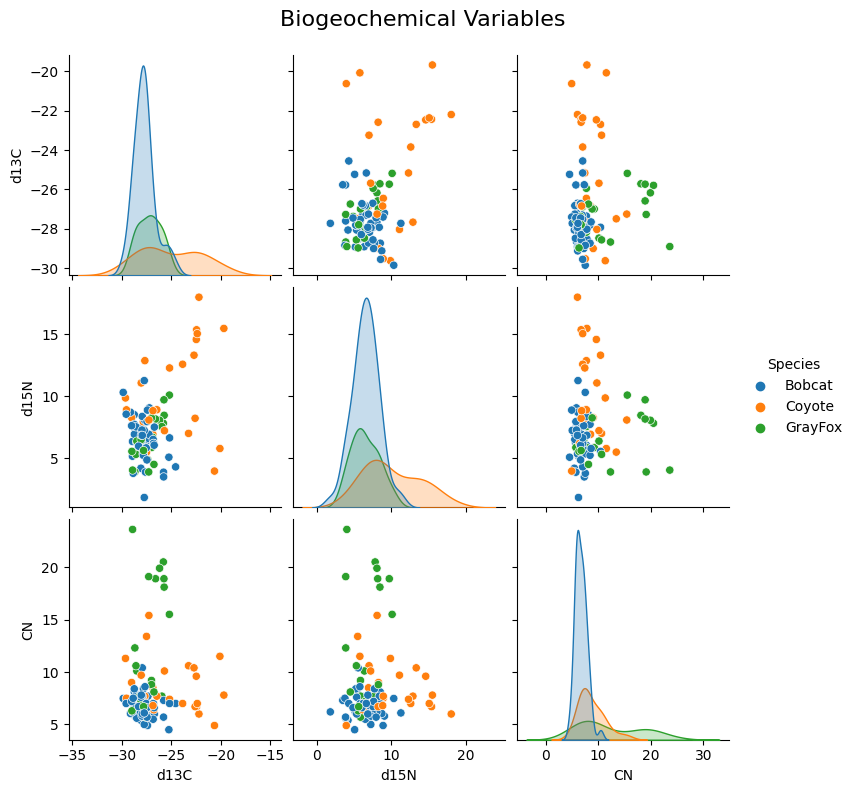

In [520]:

x = ['d13C', 'd15N', 'CN', 'Species']
g = sns.pairplot(df_fill[x], hue='Species')
g.fig.suptitle("Biogeochemical Variables", fontsize=16, y=1.05)
plt.subplots_adjust(top=0.99)

From the above plot we can see which pairs of variables have high predictiveness with the target variable species. We can also see whether or not certain variables are linearly correlated. One can see that Coyotes have higher levels of d13C compared to other species. One can also deduce that coyotes have higher levels of d15N as well. One can also see from the plot that bobcats have a lot tighter distributions than the other species. In the bottom CN distributuion plot we can see that the distributions between species varies quite nicely as well. 

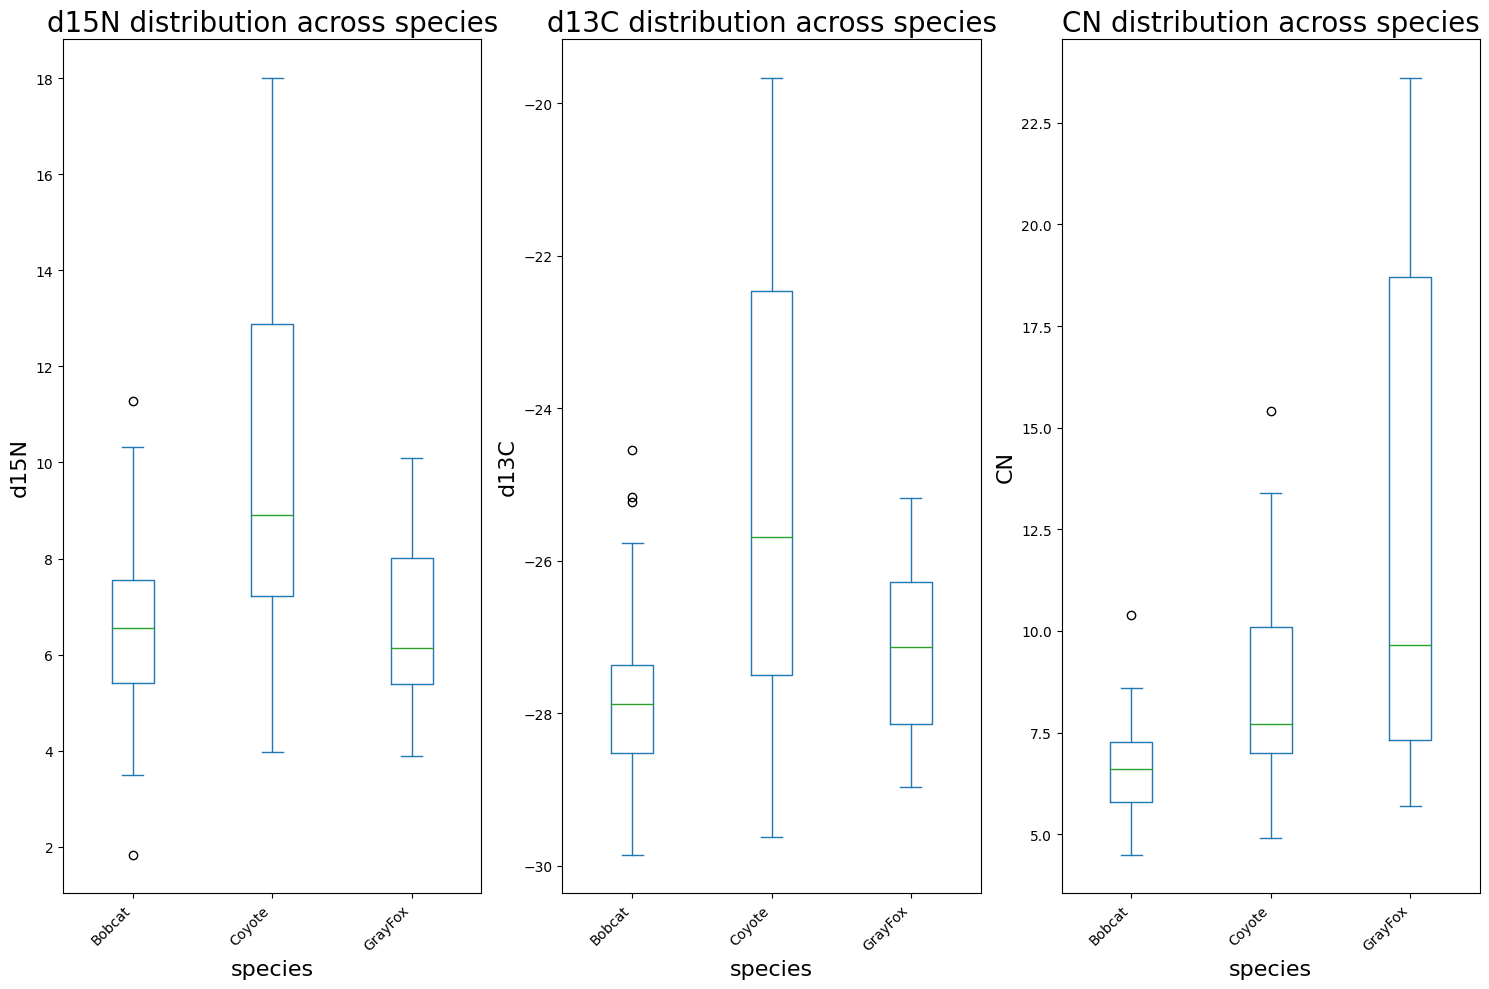

In [521]:
fig, ax = plt.subplots(figsize=(15, 10), ncols=3)


make_box_plot_species(df_fill, 'd15N', ax[0])
make_box_plot_species(df_fill, 'd13C', ax[1])
make_box_plot_species(df_fill, 'CN', ax[2])
plt.tight_layout()

What becomes evident in this plot is that bobcats have lower C:N ratios then Coyotes and Gray Foxes. Coyotes typically have higher N and C totals than other species. 

Since these are continuous variables and we want to see their correlation with the target variable 'Species' we will use the kruskal test from scipy stats library.

In [522]:
from scipy.stats import kruskal

for col in ['d15N', 'd13C', 'CN']:
    samples_by_group = [] 
    for value in set(df_fill[col]): 
        mask = df_fill[col] == value 
        
        samples_by_group.append(df_fill["Species"][mask]) 
        
    stat, p = kruskal(*samples_by_group, nan_policy='omit')

    print(f'{col} p: {p}')
    print(f'{col} stat: {stat}')
    

d15N p: 0.400584973122597
d15N stat: 90.70278959810874
d13C p: 0.3564501629463166
d13C stat: 86.1147990543735
CN p: 0.24602183896978475
CN stat: 57.53877383766752


c:\CS3300\venv\lib\site-packages\scipy\stats\_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


Unfortunately with p-values of 0.41, 0.37 and 0.35 we must reject the null hypothesis. There is not enough evidence to suggest that there is a significant difference across the median of d13C, d15N and CN.

Of all three of these variables I would say that CN is the most predictive of the three. CN has a different median for Bobcats, Coyotes and Grey foxes which makes it a useful feature. d13C and d15N both have very similar distributions. In both coyotes have a higher median than bobcats and gray foxes. 

### Continuous Morphological variables

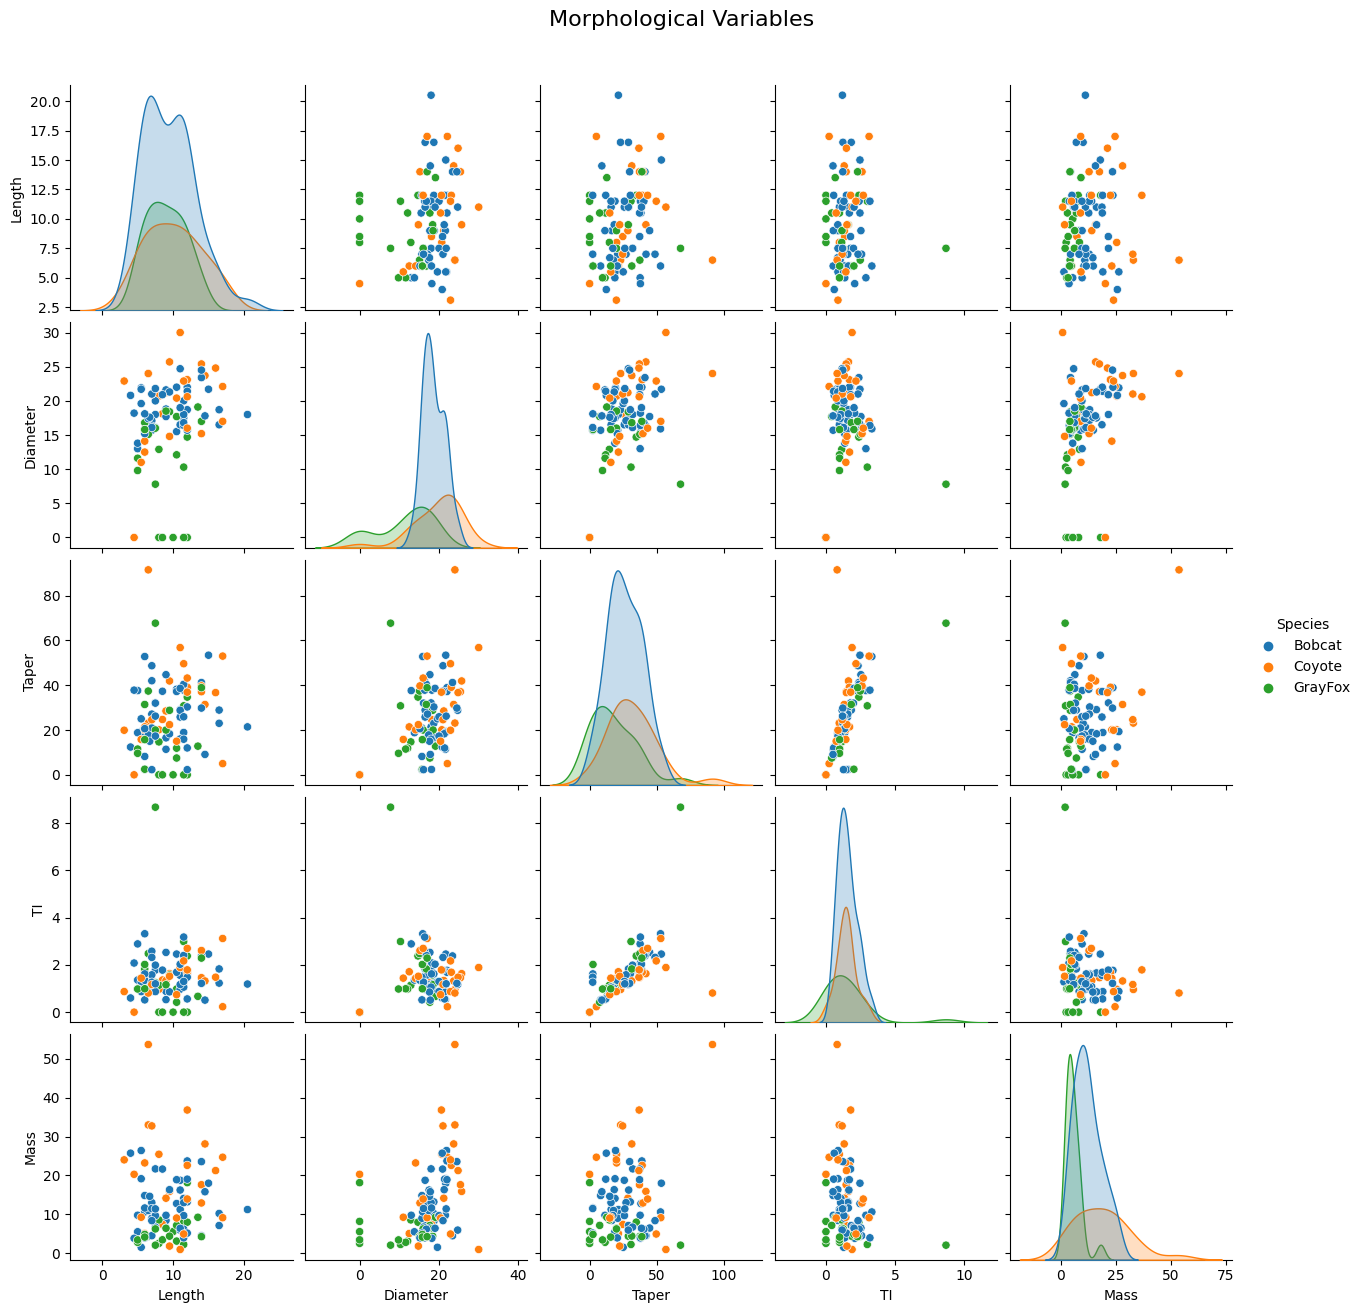

In [523]:
x = ['Length', 'Diameter', 'Taper', 'TI', 'Mass', 'Species']
g = sns.pairplot(df_fill[x], hue='Species')
g.fig.suptitle("Morphological Variables", fontsize=16, y=1.05)
plt.subplots_adjust(top=0.99)

As one can see many of the distributions on the diagonal overlap. Mass and diameter have a little bit more differentiation compared to the others. One can also see that Taper and TI are linearly correlated. Overall all the scatter plots are quite jumbled and do not show as much promise as the biogeochemical measurements. 

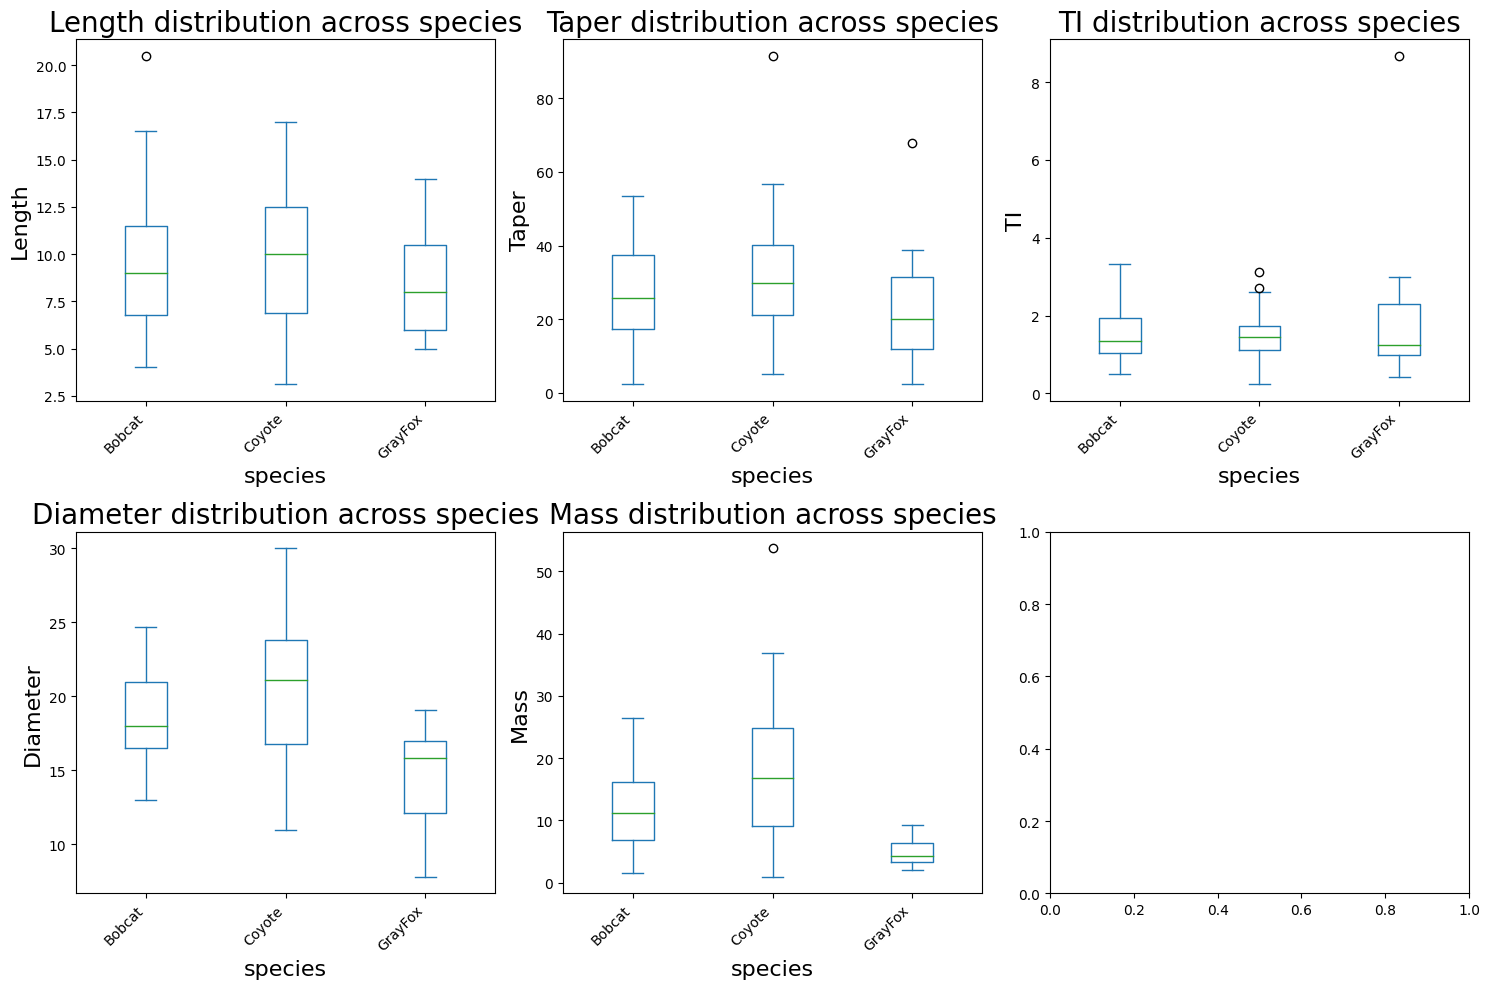

In [524]:
fig, ax = plt.subplots(figsize=(15, 10), ncols=3, nrows=2)


make_box_plot_species(df_no_fill, 'Length', ax[0, 0])
make_box_plot_species(df_no_fill, 'Diameter', ax[1, 0])
make_box_plot_species(df_no_fill, 'Taper', ax[0,1])
make_box_plot_species(df_no_fill, 'TI', ax[0,2])
make_box_plot_species(df_no_fill, 'Mass', ax[1,1])

plt.tight_layout()

From this plot we can see that the mass of scat for gray foxes is generally lower than other species. The diameter is also a little bit lower for Gray foxes. However, diameter's difference is not as significant ans Mass's. Length, Taper, TI all have little variation across species. 

In [525]:
from scipy.stats import kruskal

for col in ['Length', 'Taper', 'TI', 'Diameter', 'Mass']:
    samples_by_group = [] 
    for value in set(df_fill[col]): 
        mask = df_fill[col] == value 
        
        samples_by_group.append(df_fill["Species"][mask]) 
        
    stat, p = kruskal(*samples_by_group, nan_policy='omit')

    print(f'{col} p: {p}')
    print(f'{col} stat: {stat}')

Length p: 0.5379195183669037
Length stat: 24.66633359600736
Taper p: 0.3008544001438609
Taper stat: 87.12838455476746
TI p: 0.2742354214376373
TI stat: 82.93623325453107
Diameter p: 0.0849385732342165
Diameter stat: 85.64677698975568
Mass p: 0.5043590967122267
Mass stat: 93.18505910165486


c:\CS3300\venv\lib\site-packages\scipy\stats\_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


From the Kruskal-Wallis test we see that most variables have a high p value. The lowest one is that Diameter, which makes me believe this one has the highest 'correlation' with the target variable 'Species'. 

### Categorical (Boolean) Morphological variables

<AxesSubplot: title={'center': 'Flat distribution across Species'}, xlabel='Species', ylabel='Flat'>

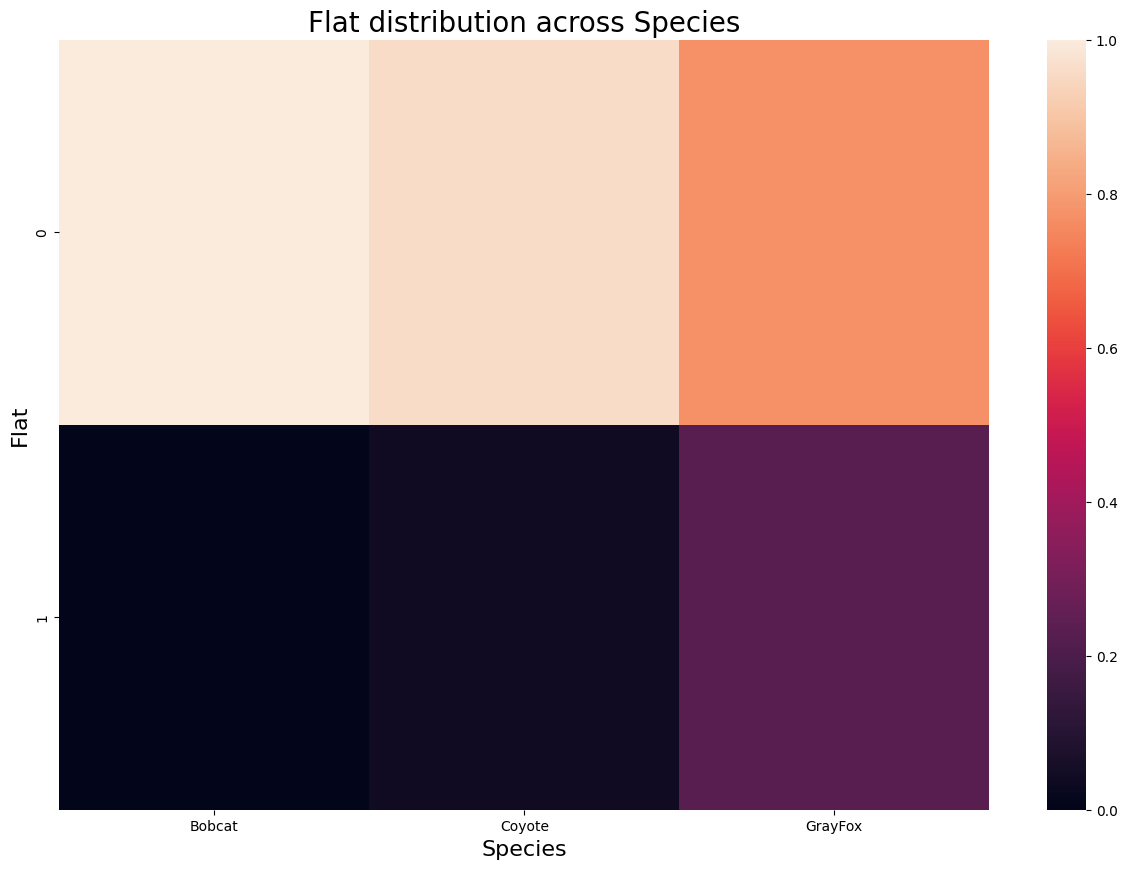

In [526]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(pd.crosstab(df_fill['Flat'], df_fill['Species'], normalize='columns'), xticklabels=True, yticklabels=True, ax=ax)
make_pretty(ax, 'Flat distribution across Species', 'Species', 'Flat')

Bobcats have no Flat scats. Gray Foxes have 75/25 split.Coyotes have around a 85/15 split.

<AxesSubplot: title={'center': 'Segmented distribution across Species'}, xlabel='Species', ylabel='Segmented'>

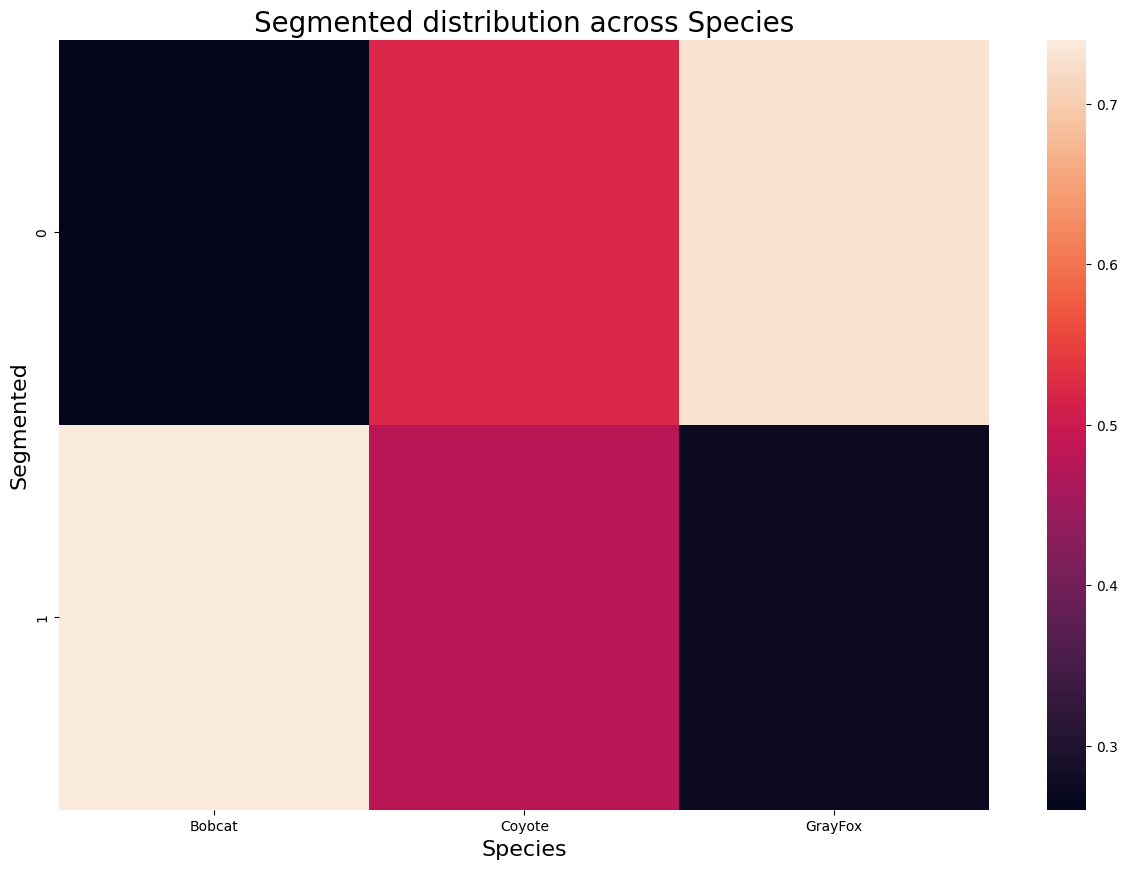

In [527]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(pd.crosstab(df_fill['Segmented'], df_fill['Species'], normalize='columns'), xticklabels=True, yticklabels=True, ax=ax)

make_pretty(ax, 'Segmented distribution across Species', 'Species', 'Segmented')

Bobcats have almost all segmented scats. Gray foxes have almost no segmented scats. Cotyotes is a pretty even mix. 

<AxesSubplot: title={'center': 'Ropey distribution across Species'}, xlabel='Species', ylabel='Ropey'>

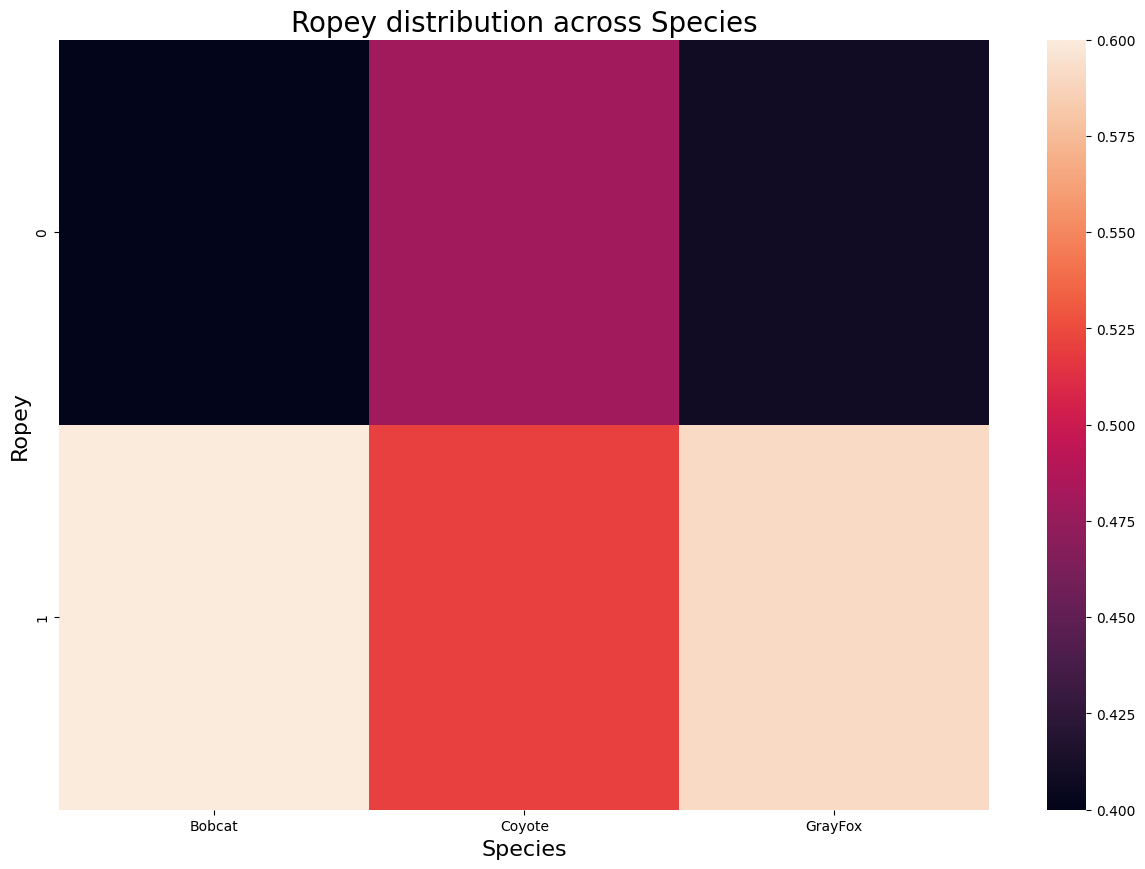

In [528]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(pd.crosstab(df_fill['Ropey'], df_fill['Species'], normalize='columns'), xticklabels=True, yticklabels=True, ax=ax)

make_pretty(ax, 'Ropey distribution across Species', 'Species', 'Ropey')

Bobcats and gray foxes have mostly ropey scats while coyotes have more of a mix.

In [529]:
from scipy.stats import chi2_contingency

for val in ['Ropey', 'Segmented', 'Flat']:
    comb_counts = pd.crosstab(df_fill[val], df_fill['Species'])
    chi2, p, _, _ = chi2_contingency(comb_counts)
    
    print(f'{val} chi2: {chi2}')
    print(f'{val} p: {p}')

Ropey chi2: 0.4586529933481154
Ropey p: 0.7950689037705502
Segmented chi2: 14.625889807162535
Segmented p: 0.0006668503476387337
Flat chi2: 13.876200466200466
Flat p: 0.0009701108320969642


With a very low p value in 'Flat' and 'Segemented' the observed correlation between the variables and the output should not be ignored. The observed correlation is likely NOT due to chance. Segmented and Flat both have high predictability. 

In [530]:
df_fill = df_fill[df_fill['Species'] == 'Bobcat']
df_fill.head(10)

,Species,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat
2,Bobcat,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0
6,Bobcat,6.0,15.7,8.2,0.52,14.82,-28.06,4.20,5.4,1,1,0
7,Bobcat,5.5,21.9,19.3,0.88,26.41,-27.60,3.89,5.6,0,1,0
8,Bobcat,11.0,17.5,29.1,1.66,16.24,-28.64,7.34,5.8,0,1,0
9,Bobcat,20.5,18.0,21.4,1.19,11.22,-27.35,6.06,7.7,1,1,0
16,Bobcat,5.0,13.0,37.6,2.89,9.75,-27.92,7.57,5.8,1,1,0
18,Bobcat,10.5,15.5,38.2,2.46,12.76,-25.77,3.88,5.7,1,0,0
19,Bobcat,11.0,16.5,25.8,1.56,18.75,-28.91,6.36,6.0,1,1,0
20,Bobcat,11.5,17.5,18.9,1.08,14.08,-27.30,6.61,6.9,1,1,0
21,Bobcat,7.5,18.0,32.1,1.78,21.69,-27.20,9.07,5.8,1,1,0


In [531]:
df_fill.corr()

C:\Users\paganinik\AppData\Local\Temp\ipykernel_872\1851305850.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_fill.corr()


,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN
Length,1.000000,0.209238,0.106319,0.014191,0.031811,0.059213,0.131930,0.092022
Diameter,0.209238,1.000000,0.110632,-0.276692,0.400816,-0.302714,0.193465,0.030878
Taper,0.106319,0.110632,1.000000,0.819278,-0.122991,0.070418,-0.124241,0.085406
TI,0.014191,-0.276692,0.819278,1.000000,-0.348756,0.277082,-0.158823,0.059119
Mass,0.031811,0.400816,-0.122991,-0.348756,1.000000,-0.303667,0.093792,-0.243167
d13C,0.059213,-0.302714,0.070418,0.277082,-0.303667,1.000000,-0.361763,-0.205192
d15N,0.131930,0.193465,-0.124241,-0.158823,0.093792,-0.361763,1.000000,-0.057595
CN,0.092022,0.030878,0.085406,0.059119,-0.243167,-0.205192,-0.057595,1.000000


Making a linear regression model to get coefficients for each variable


In [532]:
df_fill.head()

,Species,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat
2,Bobcat,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0
6,Bobcat,6.0,15.7,8.2,0.52,14.82,-28.06,4.20,5.4,1,1,0
7,Bobcat,5.5,21.9,19.3,0.88,26.41,-27.60,3.89,5.6,0,1,0
8,Bobcat,11.0,17.5,29.1,1.66,16.24,-28.64,7.34,5.8,0,1,0
9,Bobcat,20.5,18.0,21.4,1.19,11.22,-27.35,6.06,7.7,1,1,0


In [533]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer



ordinal = OrdinalEncoder()
minmax = MinMaxScaler()

lin_reg_df = df_no_fill.copy()

lin_reg_df[['Species']] = ordinal.fit_transform(lin_reg_df[['Species']])
lin_reg_df[cont_vars] = minmax.fit_transform(lin_reg_df[cont_vars])

lin_reg_df.head()
lin_reg = LogisticRegression(multi_class='ovr')

x_feats = ['Length', 'Diameter', 'Taper', 'TI', 'Mass', 'd13C', 'd15N', 'CN', 'Ropey', 'Segmented', 'Flat']


scores = cross_val_score(lin_reg, lin_reg_df[x_feats], lin_reg_df[['Species']], cv=5)

print(scores)

lin_reg.fit(lin_reg_df[x_feats], lin_reg_df[['Species']])



for val in range(len(x_feats)):
    print(f'Coefficient for {x_feats[val]}: {lin_reg.coef_[0][val]}')




[0.63157895 0.66666667 0.55555556 0.83333333 0.77777778]
Coefficient for Length: -0.20259771026485693
Coefficient for Diameter: 0.2476767246712464
Coefficient for Taper: -0.18159144226897223
Coefficient for TI: -0.025478666474998586
Coefficient for Mass: -0.34157101292907993
Coefficient for d13C: -1.6053616561090087
Coefficient for d15N: -1.2374083806538356
Coefficient for CN: -1.8578665506129655
Coefficient for Ropey: 0.03962081349125254
Coefficient for Segmented: 0.9945611066347347
Coefficient for Flat: 0.0


c:\CS3300\venv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\CS3300\venv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\CS3300\venv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\CS3300\venv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In this part of the analysis, I fitted a logistic regression model to the data. It was able to achieve accuracy above 55% for all folds. If we extract the coefficients of the data we can see which features the model values the most. From this analysis we can see that CN has the highest coefficient and therefore the highest predictability for this model.

### Determine which traits can be used to distinguish at least one species from the rest.
(part of question 7)

Biogeochemical traits that can distinguish between at least one species and the rest: 
- CN is most likely the highest predictor of species of the whole data set
- CN vs. d15N together can likely produce very good results
- d15N and d13C on their own are also good predictors. However not as good as CN

Morphological continuous traits that can distinguish between at least one species and the rest:
- Of all the morphological continuous traits the one that shows the most promise is the mass variable, however the p value is very high for this one. 
- Therefore, I include the diameter as another good predictor

Morphological continuous traits that can distinguish between at least one species and the rest: 
- Segmeneted has the most promise in these types of variables. 
- Ropey also had a very low p value so I would feel comfortable saying Ropey has good predicitability as well. 


['CN', 'd15N', 'd13C', 'Diameter', 'Mass', 'Segmented', 'Ropey']

## Part 3: Discussion and Interpolation

### 9. Make a table of all traits that separate at least one species from the rest. Use descriptive statistics (e.g., mean, mode, etc.) to characterize the values for each species.

 



#### Bobcat descriptive stats for continuous variables

| Trait    | Bobcat Count | Bobcat mean | Bobcat min | Bobcat Max | Bobcat STD |
|----------|--------------|-------------|------------|------------|------------|
| CN       | 50           | 6.64        | 4.5        | 10.4       | 1.1        |
| d15N     | 50           | 6.5         | 1.84       | 11.3       | 1.8        |
| d13C     | 50           | -27.7       | -29.8      | -24.6      | 1.1        |
| mass     | 50           | 12.1        | 1.5        | 26.4       | 6.3        |
| diameter | 50           | 18.6        | 13         | 24.7       | 2.7        |

#### Gray Fox descriptive stats for continuous variables

| Trait    | Gray Fox Count | Gray Fox Mean | Gray Fox Min | Gray Fox Max | Gray Fox STD |
|----------|----------------|---------------|--------------|--------------|--------------|
| CN       | 17             | 10.3          | 5.7          | 23.6         | 5.2          |
| d15N     | 17             | 5.8           | 3.9          | 8.47         | 1.4          |
| d13C     | 17             | -27.6         | -28.97       | -25.7        | 1.0          |
| mass     | 17             | 5.0           | 2.1          | 9.2          | 2.2          |
| diameter | 17             | 14.7          | 7.8          | 19.1         | 3.4          |

#### Coyotes descriptive stats for continuous variables

| Trait    | CoyoteCount | Coyote Mean | Coyote Min | Coyote Max | Coyote STD |
|----------|-------------|-------------|------------|------------|------------|
| CN       | 24          | 8.6         | 4.9        | 15.4       | 2.5        |
| d15N     | 24          | 10.0        | 4.0        | 18.0       | 3.7        |
| d13C     | 24          | -25.1       | -29.6      | -19.7      | 3.1        |
| mass     | 24          | 18.7        | 0.9        | 53.7       | 12.6       |
| diameter | 24          | 20.5        | 11.0       | 30         | 4.7        |


One nice observation that can be made right off the bat is that CN mean varies nicely between species. Mass's mean also varies nicely across species, however the standard deviation of mass is the highest across the data set, making it more unreliable for prediction. 

#### Descriptive stats for categorical variables

Value counts table
| Trait         | Coyote | Bobcat | Gray Fox |
|---------------|--------|--------|----------|
| Segmented = 1 | 12     | 37     | 6        |
| Segmented = 0 | 13     | 13     | 16       |
| Ropey = 1     | 13     | 30     | 13       |
| Ropey = 0     | 12     | 20     | 9        |

If a scat is Segmented it is most likely a Bobcat, so there is some correlation between a positive Segmented value and the species. Bobcat's also exhibit a high value for Ropey. It seems like these variables can be helpful in discerning bobcat vs non-bobcat.

All the followiong code was used to complete the above part. Some parts I would simply swap out the species name to get the correct values.

In [534]:
df_no_fill.head()

,Species,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat
0,Coyote,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0
1,Coyote,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0
2,Bobcat,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0
3,Coyote,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0
4,Coyote,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,0,1,0


In [535]:
df_no_fill['Species'].value_counts()



Bobcat     50
Coyote     24
GrayFox    17
Name: Species, dtype: int64

In [536]:
df.head()

,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat,Scrape
0,Coyote,January,2012,YOLA,Edge,5,2,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0,0
1,Coyote,January,2012,YOLA,Edge,3,2,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0,0
2,Bobcat,January,2012,YOLA,Middle,3,2,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0,1
3,Coyote,January,2012,YOLA,Middle,5,2,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0,0
4,Coyote,January,2012,YOLA,Edge,5,4,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,0,1,0,0


In [537]:
x = df_no_fill[df_no_fill['Species'] == 'Coyote']
x[['CN', 'd15N', 'd13C','Mass', 'Diameter']].describe()

,CN,d15N,d13C,Mass,Diameter
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8.583333,9.960833,-25.149167,18.650000,20.466667
std,2.476615,3.749793,3.059507,12.617562,4.709811
min,4.900000,3.970000,-29.620000,0.940000,11.000000
25%,6.950000,7.175000,-27.532500,9.097500,16.750000
50%,7.700000,8.875000,-26.065000,16.750000,21.100000
75%,9.800000,12.662500,-22.452500,24.880000,23.775000
max,15.400000,18.000000,-19.670000,53.700000,30.000000


In [538]:
df = df_no_fill.copy()
for species in ['Bobcat', 'Coyote', 'GrayFox']:
    x = df[df['Species'] == species]

    for col in ['CN', 'd15N', 'd13C', 'Mass', 'Diameter']:
    
        print()
        print(f'Mean {col} for {species}: {x[col].mean()}')
        
        


Mean CN for Bobcat: 6.6354

Mean d15N for Bobcat: 6.5346

Mean d13C for Bobcat: -27.738800000000005

Mean Mass for Bobcat: 12.106

Mean Diameter for Bobcat: 18.601999999999997

Mean CN for Coyote: 8.583333333333334

Mean d15N for Coyote: 9.960833333333333

Mean d13C for Coyote: -25.149166666666662

Mean Mass for Coyote: 18.650000000000002

Mean Diameter for Coyote: 20.466666666666665

Mean CN for GrayFox: 10.28235294117647

Mean d15N for GrayFox: 5.839999999999999

Mean d13C for GrayFox: -27.590000000000003

Mean Mass for GrayFox: 5.02

Mean Diameter for GrayFox: 14.670588235294119


In [539]:
for species in ['Bobcat', 'Coyote', 'GrayFox']:
    x = df[df['Species'] == species]

    for col in ['Segmented', 'Ropey']:
        
        
        print(f'Value counts {col} for {species}: \n{x[col].value_counts()}\n')

Value counts Segmented for Bobcat: 
1    37
0    13
Name: Segmented, dtype: int64

Value counts Ropey for Bobcat: 
1    30
0    20
Name: Ropey, dtype: int64

Value counts Segmented for Coyote: 
0    12
1    12
Name: Segmented, dtype: int64

Value counts Ropey for Coyote: 
1    13
0    11
Name: Ropey, dtype: int64

Value counts Segmented for GrayFox: 
0    11
1     6
Name: Segmented, dtype: int64

Value counts Ropey for GrayFox: 
1    13
0     4
Name: Ropey, dtype: int64



### 10. Using what you learned from your research, explain how the traits with differences relate to differences in the biology of the three species.

CN, which is the ratio between Carbon and Nitrogen Isotopes found in the scat samples had a distinguishable difference between Species types. CN shows the most correlation with the target variable. This makes sense, because the diets of the three different species varies. Bobcats eat a carnivore diet leading to them having the lowest CN ratio. Coyotes eat small mammals, birds and reptiles like bobcats, but they also eat fruits and vegetables as well as garbage or pet food. Gray foxes eat small rodents, birds, insects as well as fruit, giving them the highest CN ratio. All of their diets have some commonality, however they also vary which leads to their CN ratios to vary. 

Diameter and mass (morphological traits) were also good predictors of Species. They were found to have the highest correlation with the target variable from all the morphological variables. Tying this to what I learned from reading about the different types of species, is that they all vary in size. Logically, this would lead to different sphincter sizes and therefore different diameter and mass scats. Bobcats are heavier then coyotes and gray foxes, so the mass of their scat was higher. Thinking about the real world, it makes sense that scat mass varies so much. After a big meal scat sizes are most likely larger, than after smaller meals. Mass of scat not only depends on the size of the species, but also how much they ate just before. 

Segmented and Ropey (boolean traits), which are morphological varaiables describing how the scat looks, are the highest correlated variables with the target variable. They both achieved very low p values making them very attractive for use in models. Segmented is probably the best predictor of the boolean traits. Segmented mostly, but also Ropey, are good predictors for predicting whether the scat was from a bobcat or not. This differentiation may be explainable by the different families the species are apart of. Bobcats are part of the Felidae family, while gray foxes and coyotes are part of the Canidae family. The diets also vary significantly between the species so this may be apart of it as well. Another possible explanation is that the urination and defecation habits between the different species differ. 

## Part IV: Conclusion 
Write a conclusion. The conclusion should summarize your key findings and describe what 
someone could do to continue or expand on this work. 


It is possible to some what accurately classify bobcats, coyotes and gray foxes through the collection and analysis of scat samples. The use of not only morphological, but also biogeochemical and contextual traits, makes this possible. Through the use of visualisation tools and statistical tests, I was able to discern that the traits with the most predictability (when it comes to Species) are the C:N ratio (biogeochemical), the mass and diameter (continuous morphological) and whether the sample was segmented or not (categorical morphological). Other traits of the scat are also correlated with the target variable, however the aforemenetioned variables were the highest predictors. There are two obvious continuations possible following this analysis. The collection of more scat samples can help increase sample sizes for statistical tests. This would reduce the likelihood of anomalies in the data and help with training a model, which is another continuation. Dr. Reid was only able to use a discriminant function analysis as well as a random forest. With more data a neural network becomes possible. Furthermore, it would be interesting to see if these results would be the same if it were done in a different geographical location. If a accurate model was created to be able to identify species through scat sample, conservational ecologists and wildlife researchers could estimate population sizes more quickly and cost effectively. Neighborhoods can also be at ease knowing that they can identify whether predators are in the area so their pets due not get into an altercation.

## Sources:

- The Editors of Encyclopaedia Britannica. (1/15/2023). Gray Fox. Retrieved from https://www.britannica.com/animal/gray-fox
- The Editors of Encyclopaedia Britannica. (1/15/2023). Coyote. Retrieved from https://www.britannica.com/animal/coyote-mammal
- The Editors of Encyclopaedia Britannica. (1/15/2023). Bobcat. Retrieved from https://www.britannica.com/animal/bobcat
- International Union for Conservation of Nature. (1/15/2023). Retrieved from https://www.iucn.org/
- Rasmussen, K. (1/15/2023). How Biologists Estimate Populations of Animals. Alaska Department of Fish and Game. Retrieved from https://adfg.alaska.gov/index.cfm?adfg=wildlifenews.view_article&articles_id=814
- Rye, C., Wise, R., Jurukovski, V., DeSaix, J., Choi, J., & Avissar, Y. (1/15/2023). Population Demography. Openstax. Retrieved from https://openstax.org/books/biology/pages/45-1-population-demography 
